In [78]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [79]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0,0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)


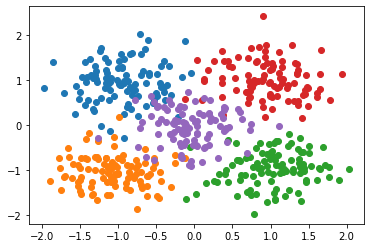

In [80]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [81]:
#one hot encoding
y_cat = to_categorical(y,5) #give 0 the label of 1. 0. 0., 1 the label of 0. 1. 0. etc. The first argument takes the variable you want to hot encode and the second variabel takes no of digits you want to encode to  
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [82]:
#defining the neural layer
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs=1996)

Epoch 1/1996
10/10 [==============================] - 0s 5ms/step - loss: 0.1528 - accuracy: 0.9460
Epoch 2/1996
10/10 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9460
Epoch 3/1996
10/10 [==============================] - 0s 2ms/step - loss: 0.1533 - accuracy: 0.9460
Epoch 4/1996
10/10 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9500
Epoch 5/1996
10/10 [==============================] - 0s 3ms/step - loss: 0.1530 - accuracy: 0.9480
Epoch 6/1996
10/10 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9480
Epoch 7/1996
10/10 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9480
Epoch 8/1996
10/10 [==============================] - 0s 3ms/step - loss: 0.1528 - accuracy: 0.9480
Epoch 9/1996
10/10 [==============================] - 0s 5ms/step - loss: 0.1517 - accuracy: 0.9480
Epoch 10/1996
10/10 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9520

/Volumes/MyData/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is:  [4]


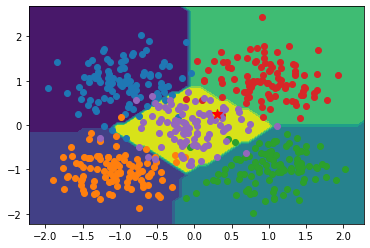

In [84]:
def plot_decision_boundary(X,y_cat,model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25) #select 50 equally distributed points between the lowest Xcordinate and highest Xcordinate
    y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25) #""for Y; by +- 1 we are making our grid more spacious
    xx, yy = np.meshgrid(x_span, y_span) #(xx and yy are made 2d array)since we got 50 elements in xx, this func will make a 50x50 grid/matrix of that by repeating the one unique row 50 times, for the second argument, unique 50 column element of yy is repeated 50 times
    xx1D, yy1D = xx.ravel(), yy.ravel() #xx and yy are made 1d here with 50x50 elements. In xx elements are repeated after 49 other numbers in sequence, single element in yy is repeated 50 times then another element is repeated 50 times.
    grid = np.c_[xx1D, yy1D] #c_ concatenates elements in a column
    
    #predictions = model.predict_classes(grid)#predict_classes = special for multi data class #it tests every points in this grid for its probability of being 1 or 0 as we labeled. ?so we are also testing the points which are not in our initial data set?
    predictions = np.argmax(model.predict(grid), axis=-1)
    z = predictions.reshape(xx.shape)
    
    plt.contourf(xx, yy, z)

plot_decision_boundary(X,y_cat,model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.3
y = 0.25
point = np.array([[x,y]])
predictThisPoint = model.predict_classes(point)
plt.plot([x],[y], marker = "*", markersize=10, color="red")
print('Prediction is: ', predictThisPoint)